<a href="https://colab.research.google.com/github/MarkPesano/Lab_03/blob/main/Mark_Pesano_Lecture_air_resistance_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Air Resistance with the Euler Method
*written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 2*

# Overview

We can model the motion of any system if we know the net force.  Starting with Newton's second law in one dimension:

$$ F = m a$$

and we know acceleration is the change in velocity with time, $a = dv/dt$.

We can then solve the second law for acceleration:

$$ \frac{dv}{dt} = \frac{F}{m} $$

If we instead use differences instead of the derivative, we get:

$$ \frac{\Delta v}{\Delta t} = \frac{F}{m} $$

$$ \frac{v_{i+1} - v_i}{\Delta t} = \frac{F}{m} $$

We can solve for $v_{i+1}$:
$$ v_{i+1}  = v_i + \frac{F}{m} \Delta t $$

We can use this equation with the Euler method to approximate how velocity varies with time, if we know the net force $F$.

We will first develop code for an object without air resistance, and we will then model the addition of air resistance.




In [1]:
# import numpy, pyplot, and math
import math
import numpy as np
from matplotlib import pyplot as plt


# But first - some practice with functions!

Write a function called **req_parallel** that takes in a list of resistors and calculates the equivalent resistance for when they are connected in parallel.

* input
  * list or array of resistor values
* function will
  * calculate Req for resistors connected in parallel
* return
  * the equivalent resistance

In [8]:
# write your function req_parallel here
def req_parallel(rvals):
  req = 0
  for i in range(len(rvals)):
    req = req +1/rvals[i]
  return (1/req)


In [18]:
# write code to test the output for 3 resistors (each 10 ohm) connected
# in parallel.  Solve the problem by hand first, and then use assert
# to check the value from your function
testlist = (10,10,10)
test_1 = req_parallel(testlist)
print(f"When we have 3, 10 ohm resistors in parallel, the equivalent resistance is {test_1:.2f}")
assert test_1 == 3.333333333333333


When we have 3, 10 ohm resistors in parallel, the equivalent resistance is 3.33


### Using your function

Goal: to determine the current being draw from the battery in the diagram below

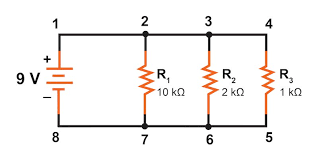

In the cell below:
* define your variables:
  * the values of $R_1, R_2, R_3$ based on the values in the picture
  * the battery voltage $V_{batt}$
* create an array with the values of the resistors.
* use your function to calculate the equivalent resistance, and save the output of your function as $Req$.
* Use Ohm's law to determine the current being drawn from the battery.
* Print out the current using a descriptive print statement.  Only print out 3 significant figures.

In [22]:
# your code here
resvals = (10000,20000,1000)
R1 = resvals[0]
R2 = resvals[1]
R3 = resvals[2]
Vbatt = 9

Req = req_parallel(resvals)

I = Vbatt/Req

print(f"In the circuit above, the equivalent resistance is {Req:.4f} and the current is {I:.4f}")



In the circuit above, the equivalent resistance is 869.5652 and the current is 0.0103


# First step in modeling motion - ignore air resistance

To start off simply, let's model the motion of a bicylist without air resistance.

We can increment velocity at each time step if we know the acceleration:

$$ v_{i+1} = v_i + a \Delta t $$


In class we showed that we can determine the velocity of a bicyclist based on their power output $P$ and mass $m$ by combining the relations $a = \frac{F}{m}$ and $P = F v$:

$$ v_{i+1} = v_i + a \Delta t $$

$$ v_{i+1} = v_i + \frac{F}{m} \Delta t $$

$$ v_{i+1} = v_i + \frac{P}{m v_i} \Delta t $$





## Acceleration function

Write a function called **acceleration** that will do the following.

* input
  * $P$ - power output of cyclist
  * $m$ - mass of the cyclist and bicycle
  * $v$ - velocity

* function will calculate acceleration as
$$ a = \frac{P}{mv} $$

* return
  * $a$ - acceleration

In [45]:
# your acceleration function here
def acceleration(P,m,v):
  a = P/(m*v)
  return a


## Write Your Initialize Function

Write a function called **initialize** that will do the following.
* input
  * v0 - initial velocity
  * tmax - total time to run simulation
  * dt - time step
* function should
  * calculate the number of steps nsteps as tmax/dt
  * make sure nsteps is an integer
  * set up arrays for velocity (v) and time (t) using `v=np.zeros(nsteps)`
  * set the first element of the velocity array to v0
* return
  * time and velocity arrays

In [46]:
# initialize function here
''' the function below takes in intial velocity, total time to run the simulation and the time steps and returns
    the time and velocity arrays'''

def intialize(v0,tmax,dt):
  '''Calculating nsteps as a integer'''
  nsteps = int(tmax/dt)
  '''setting up arrays for velocity and time'''
  v = np.zeros(nsteps)
  t = np.zeros(nsteps)
  ''' setting the first element of the velocity array to v0'''
  v[0] = v0
  return v,t



# Write the Calculate Function

Write a function called **calculate** that will do the following.

* input
  * t - time array
  * v - velocity array
  * dt - time step
  * P - power output of cyclist
  * m - mass of cyclist
* function should
  * calculate velocity and time arrays using Euler method
  ```python
  v[i] = v[i-1] + acceleration(P,m,v[i-1]) * dt
  t[i] = t[i-1] + dt
  ```
* return
  * time and velocity arrays

In [47]:
# your calculate function here
def calculate(t,v,dt,P,m):
  for i in range(1,len(t)):
    t[i] = t[i-1] + dt
  for i in range(1,len(v)):
    v[i] = v[i-1] + acceleration(P,m,v[i-1]) * dt

  return t,v



## Running your code

**Define your variables:**  Set the power output of the rider to 400 Watts.  Set the mass to 70 kg, and the initial velocity to 4 m/s.  Set the time step to 0.1 seconds, and run the calculation out to 200 seconds.

Then follow the comments to complete the Euler calculation and plot the results.


Text(0, 0.5, 'Velocity')

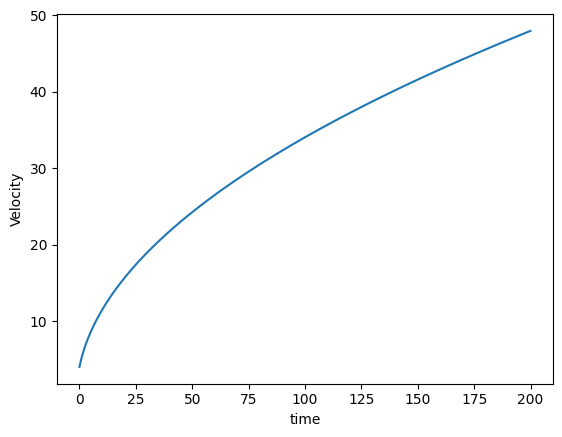

In [53]:
############################################################
# This is your main program that will call the functions.
############################################################


# define variables and initial conditions

P = 400
m = 70
v0 = 4
dt =.1
tmax =200

# call initialize and save output as t,v
v,t = intialize(v0,tmax,dt)


# call calculate, and save output as tnoair,vnoair
tnoair,vnoair = calculate(t,v,dt,P,m)
#print(tnoair)
#print(vnoair)


# plot velocity vs time with a line
# be sure to label the x and y axes
# include a legend and figure title
plt.figure()
plt.plot(tnoair,vnoair)
plt.xlabel('time')
plt.ylabel('Velocity')



## Reflection

Discuss the following questions with your neighbors, and summarize your thoughts below.

* What is the speed of the cyclist after 200 sec?
\
The speed of the cylist after 200 sec is 48 $m/s^2$
* What is this speed in mph?
\
 48 $m/s^2$ in $mph$ is 107 $mph$
* Is this a good model of the velocity of a cyclist as a function of time?  Why or why not?
\
This is a bad model because the cyclist cannot travel that fast


**Your summary:**






In [ ]:
# in case you want to convert velocity here



# Adding Air Resistance

We will make our model for the cyclist more realistic by adding the effects of air resistance.  We model the air resistance as having a quadratic dependence on velocity:
$$ F_{drag} = -B_2 v^2$$
where $B_2 = \frac{1}{2} C \rho A$.
* C = constant.  Set this equal to 0.5
* rho is the density of air.  Set this to 1.225 kg/m$^3$ for the density of air at sea level.
* A is the cross-sectional area of the cyclist, and we will use 0.33 m$^2$

## Define a new acceleration function

Write a function called **accel_resist**

* input
  * $P$ - power output of cyclist
  * $m$ - mass
  * $v$ - velocity
  * B2 - coefficient of air resistance

* function will calculate acceleration as
$$ a = \frac{P}{mv} - \frac{B_2}{m} v^2 $$

* return
  * $a$ - acceleration

In [54]:
# your accel_resist function here
def accel_resist(P,m,v,B2):
  a = (P/(m*v))-((B2/m)*v**2)
  return a


## Write a new function to calculate the Euler method

Write a function called **calculate_resist** that will do the following.

* input
  * t - time array
  * v - velocity array
  * dt - time step
  * P - power output of cyclist
  * m - mass of cyclist
  * B2 - coefficient of air resistance
* function should
  * calculate velocity and time arrays using Euler method
  ```python
  v[i] = v[i-1] + accel_resist(P,m,v[i-1],B2) * dt
  t[i] = t[i-1] + dt
  ```
* return
  * time and velocity arrays

In [56]:
# your calculate_resist function
def calculate_resist(t,v,dt,P,m,B2):
  for i in range(1,len(t)):
    t[i] = t[i-1] + dt
  for i in range(1,len(v)):
    v[i] = v[i-1] + accel_resist(P,m,v[i-1],B2) * dt
  return t,v



## Run your code with air resistance



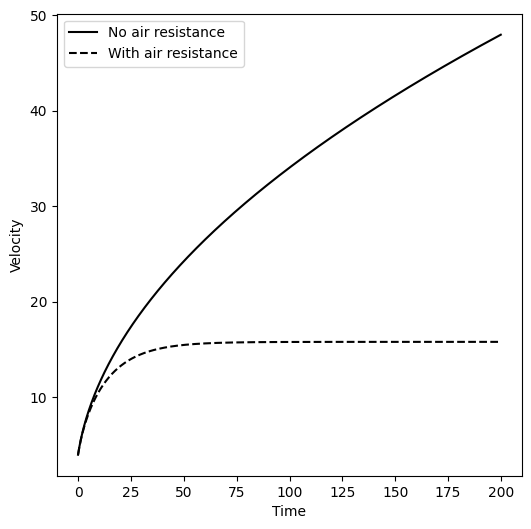

In [62]:
############################################################
# This is your main program that will call the functions.
############################################################

# set up variables

P = 400
m = 70
v0 = 4
dt =.1
tmax = 200
rho =1.225
C = .5
A = .33

# calculate B2
B2 = ((C*rho*A)/2)

# call intialize, save output as t,v
v,t = intialize(v0,tmax,dt)
# calculate the Euler method with no air resistance
# save output as tnoair, vnoair
tnoair,vnoair = calculate(t,v,dt,P,m)


# call intialize, save output as t,v
v,t = intialize(v0,tmax,dt)
# calculate the Euler method WITH air resistance
# save output as tair, vair
tair,vair = calculate_resist(t,v,dt,P,m,B2)


###############################################################
# PLOT YOUR RESULTS
###############################################################

# open a figure, and make your figure size (6,6)
plt.figure(figsize = (6,6))
# plot velocity with no air resistance vs time with a solid line
plt.plot(tnoair,vnoair,'k-',label = 'No air resistance')
# plot velocity with air resistance vs time with a dashed line
plt.plot(tair,vair,'k--',label = 'With air resistance')
# be sure to label the x and y axes
plt.xlabel('Time')
plt.ylabel('Velocity')
# include a legend and figure title
plt.legend()



# Solution for comparison

Your figure should look like this.
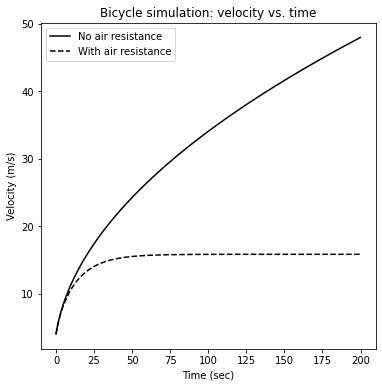

# Wiki Summary

This notebook continues what we learned in Lab 3, so you can add this summary to your Lab 3 wiki.

* describe the Euler method and why it is useful
* describe how more complicated forces can be modeled
* describe how the accuracy of the results varies with the timestep
* how do you know what timestep to use?